In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [94]:
data=pd.read_csv('hotelbookingsinfo.csv')

In [95]:
data.head()

,hotel,is_canceled,leadtime,arrivalyear,arrivalmonth,arrivalweeknumber,arrivaldayofmonth,staysweekendnights,staysweeknights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [96]:
data.shape

(119390, 32)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   leadtime                        119390 non-null  int64  
 3   arrivalyear                     119390 non-null  int64  
 4   arrivalmonth                    119390 non-null  object 
 5   arrivalweeknumber               119390 non-null  int64  
 6   arrivaldayofmonth               119390 non-null  int64  
 7   staysweekendnights              119390 non-null  int64  
 8   staysweeknights                 119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [98]:
data.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
staysweeknights 

In [99]:
data = data.drop(data[(data.adults+data.babies+data.children)==0].index)
data['company']= data['company'].fillna(0.0)


# ## For the missing values in the country column, replace it with mode (value that appears most often)
# df['country'].fillna(data.country.mode().to_string(), inplace=True)


In [100]:
data["children"].replace(np.nan, 0, inplace=True)
data['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [101]:
data['country'].fillna(method='ffill',inplace=True)
data['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [102]:
avg_agent = data['agent'].astype('float').mean(axis=0)
print("Average Agent solumn is", avg_agent)

Average Agent solumn is 86.73396483046731


In [103]:
data['agent'].replace(np.nan, avg_agent, inplace=True)

In [104]:
data[['children', 'company', 'agent']]=data[['children', 'company', 'agent']].astype('int64')

In [105]:
data = data.dropna(axis = 0)

In [106]:
data.isnull().sum().sum()

0

Text(0, 0.5, 'Reservation Count')

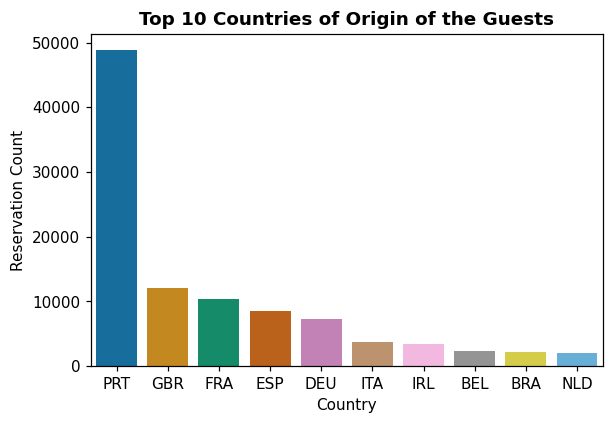

In [107]:
plt.figure(figsize=(6,4), dpi=110)
sns.countplot(x='country', data=data,order=pd.value_counts(data['country']).iloc[:10].index,palette= 'colorblind')
plt.title('Top 10 Countries of Origin of the Guests', weight='bold')
plt.xlabel('Country')
plt.ylabel('Reservation Count')

In [108]:
data['arrivalmonth'].value_counts(normalize = True)

August       0.116274
July         0.106065
May          0.098817
October      0.093507
April        0.092928
June         0.091679
September    0.088080
March        0.081939
February     0.067545
November     0.056799
December     0.056698
January      0.049669
Name: arrivalmonth, dtype: float64

Text(0, 0.5, 'Reservation Count')

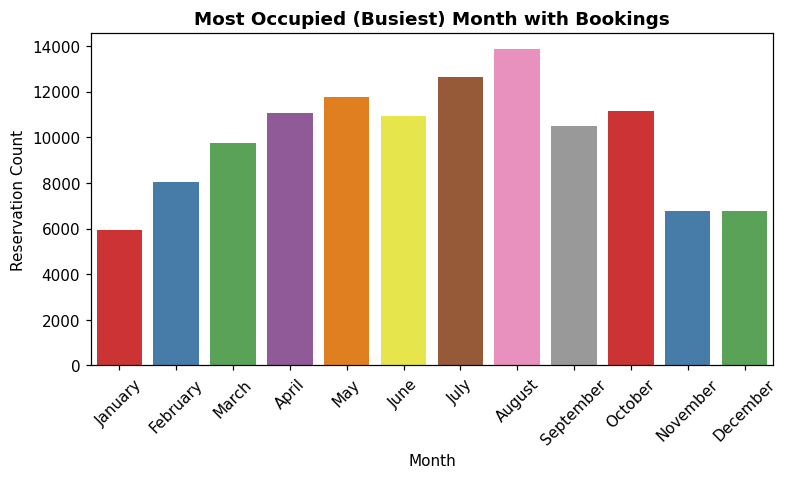

In [109]:
plt.figure(figsize=(8,4), dpi=110)
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
data['arrivalmonth'] = pd.Categorical(data['arrivalmonth'], categories=ordered_months, ordered=True)
sns.countplot(x='arrivalmonth', data = data,palette= 'Set1')
plt.title('Most Occupied (Busiest) Month with Bookings', weight='bold')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Reservation Count')


**Which Month has Highest Number of Cancellations By Hotel Type**

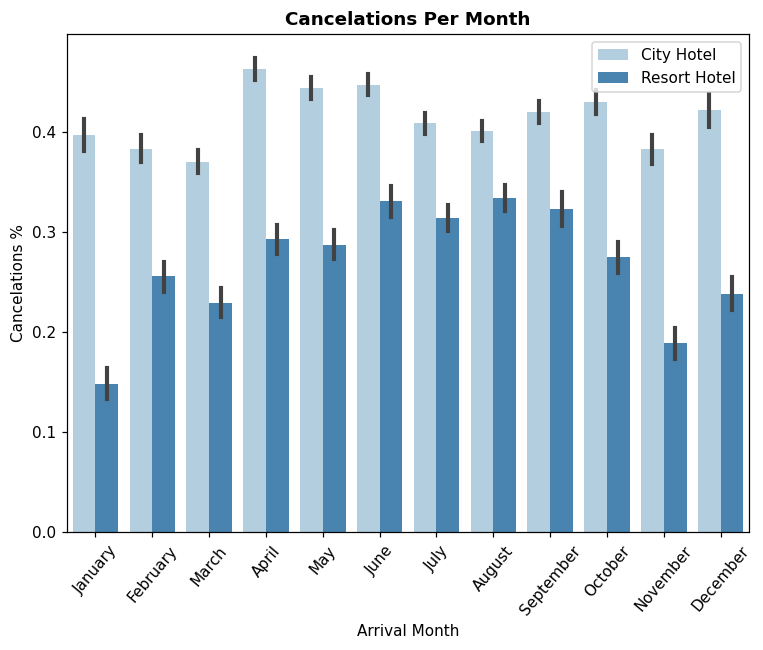

In [110]:
plt.figure(figsize=(8,6), dpi=110)
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
data['arrivalmonth'] = pd.Categorical(data['arrivalmonth'], categories=ordered_months, ordered=True)
sns.barplot(x = "arrivalmonth", y = "is_canceled", hue="hotel",hue_order = ["City Hotel", "Resort Hotel"],data=data,palette= 'Blues')
plt.title("Cancelations Per Month", weight = 'bold')
plt.xlabel("Arrival Month")
plt.xticks(rotation=50)
plt.ylabel("Cancelations %")
plt.legend(loc="upper right")
plt.show()

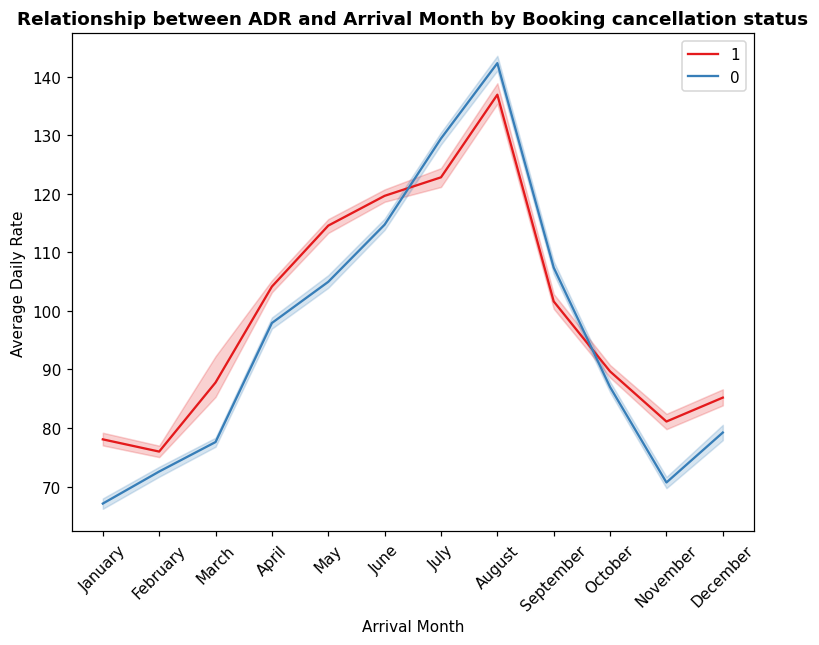

In [111]:
plt.figure(figsize=(8,6), dpi=110)
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
data['arrivalmonth'] = pd.Categorical(data['arrivalmonth'], categories=ordered_months, ordered=True)
sns.lineplot(x = "arrivalmonth", y = "adr", hue="is_canceled",hue_order= [1,0],data=data,palette= 'Set1')
plt.title("Relationship between ADR and Arrival Month by Booking cancellation status", weight = 'bold')
plt.xlabel("Arrival Month")
plt.xticks(rotation=45)
plt.ylabel("Average Daily Rate")
plt.legend(loc="upper right")
plt.show()

**How many Bookings were Cancelled at the Hotel**


In [112]:
data['is_canceled'].value_counts()

0    75011
1    44199
Name: is_canceled, dtype: int64

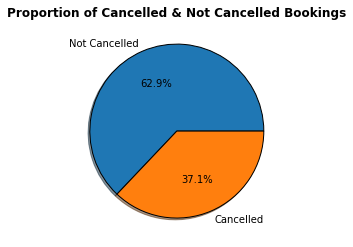

In [113]:
proportion = data['is_canceled'].value_counts()
labels = ['Not Cancelled','Cancelled']
plt.title('Proportion of Cancelled & Not Cancelled Bookings',weight = 'bold')
plt.pie(proportion,labels=labels,shadow = True, autopct = '%1.1f%%',wedgeprops= {'edgecolor':'black'})
plt.show()

**How many Bookings were Cancelled by Hotel Type**

In [114]:
data.groupby('is_canceled')['hotel'].value_counts(normalize = True)

is_canceled  hotel       
0            City Hotel      0.614363
             Resort Hotel    0.385637
1            City Hotel      0.748411
             Resort Hotel    0.251589
Name: hotel, dtype: float64

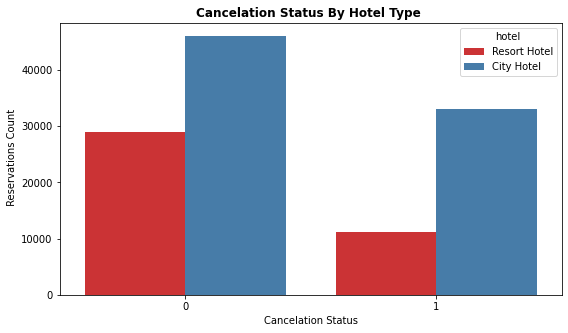

In [115]:
plt.figure(figsize = (9,5))
sns.countplot(x= 'is_canceled',data = data,hue = 'hotel',palette= 'Set1')
plt.title("Cancelation Status By Hotel Type ", weight = 'bold')
plt.xlabel("Cancelation Status")
plt.ylabel(" Reservations Count")
plt.show()

In [116]:
data['hotel'].value_counts(normalize = True)

City Hotel      0.664063
Resort Hotel    0.335937
Name: hotel, dtype: float64

Text(0, 0.5, 'Reservation Count')

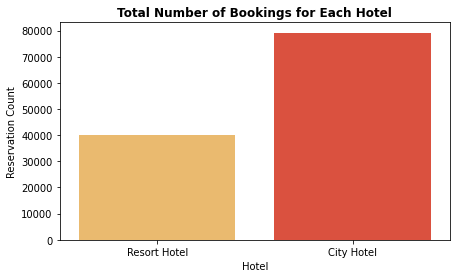

In [117]:
plt.figure(figsize = (7,4))
sns.countplot(x='hotel', data = data, palette='YlOrRd')
plt.title('Total Number of Bookings for Each Hotel', weight='bold')
plt.xlabel('Hotel')
plt.ylabel('Reservation Count')

In [118]:
data['market_segment'].value_counts(normalize = True)

Online TA        0.473182
Offline TA/TO    0.202852
Groups           0.166018
Direct           0.105545
Corporate        0.044308
Complementary    0.006107
Aviation         0.001971
Undefined        0.000017
Name: market_segment, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Reservation Count')

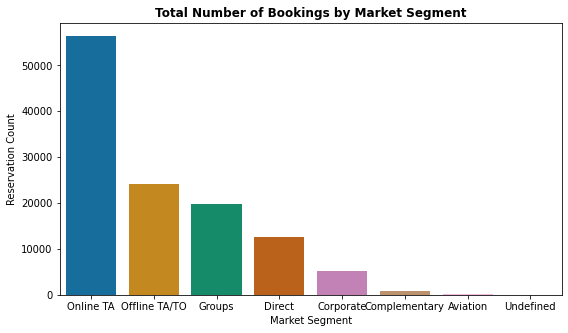

In [119]:
plt.figure(figsize = (9,5))
sns.countplot(data['market_segment'], palette='colorblind',order=pd.value_counts(data['market_segment']).index)
plt.title('Total Number of Bookings by Market Segment', weight='bold')
plt.xlabel('Market Segment')
plt.ylabel('Reservation Count')

In [120]:
data['customer_type'].value_counts(normalize = True)

Transient          0.750575
Transient-Party    0.210452
Contract           0.034158
Group              0.004815
Name: customer_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Reservation Count')

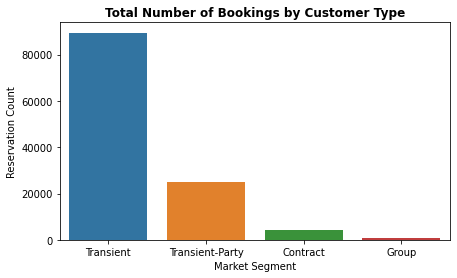

In [121]:
plt.figure(figsize= (7,4))
sns.countplot(data['customer_type'],order=pd.value_counts(data['customer_type']).index)
plt.title('Total Number of Bookings by Customer Type',weight = 'bold')
plt.xlabel('Market Segment')
plt.ylabel('Reservation Count')

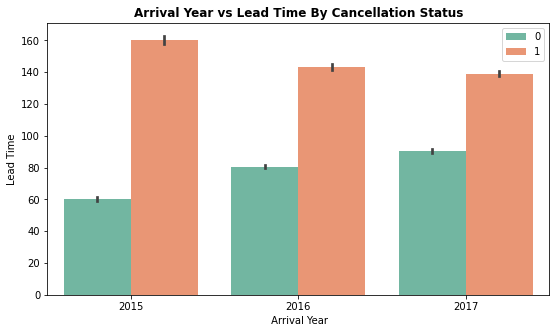

In [122]:
plt.figure(figsize= (9,5))
sns.barplot(x='arrivalyear', y ='leadtime', hue="is_canceled", data=data, palette="Set2")
plt.title('Arrival Year vs Lead Time By Cancellation Status', weight='bold')
plt.xlabel(' Arrival Year')
plt.ylabel('Lead Time')
plt.legend(loc = "upper right")

In [123]:
data['total_of_special_requests'].value_counts(normalize = True)

0    0.588885
1    0.278358
2    0.108649
3    0.020921
4    0.002852
5    0.000336
Name: total_of_special_requests, dtype: float64

Text(0, 0.5, 'Count')

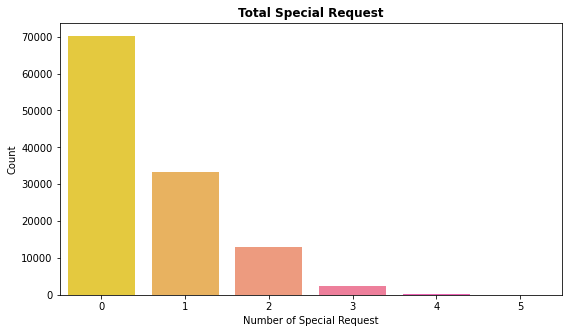

In [124]:
plt.figure(figsize = (9,5))
sns.countplot(x='total_of_special_requests', data=data, palette = 'spring_r')
plt.title('Total Special Request', weight='bold')
plt.xlabel('Number of Special Request')
plt.ylabel('Count')

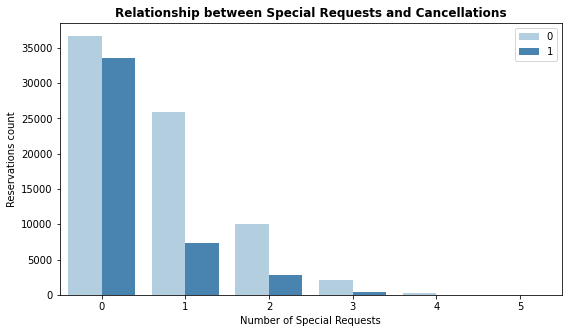

In [125]:
plt.figure(figsize = (9,5))
sns.countplot(x = "total_of_special_requests", hue = "is_canceled",data=data,palette= 'Blues')
plt.title("Relationship between Special Requests and Cancellations", weight = 'bold')
plt.xlabel("Number of Special Requests")
plt.ylabel("Reservations count")
plt.legend(loc="upper right")
plt.show()

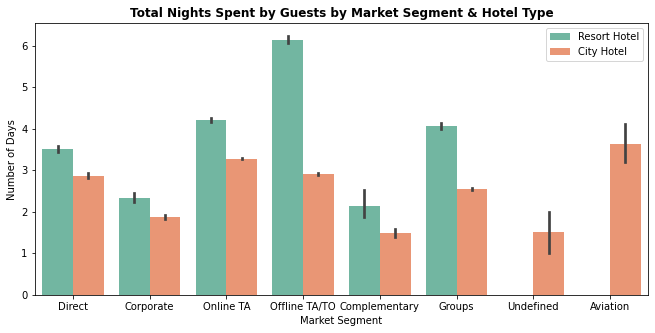

In [126]:
plt.figure(figsize = (11,5))
data['total_stay'] = data['staysweeknights'] + data['staysweekendnights'] 
sns.barplot(x = "market_segment", y = "total_stay", data = data, hue = "hotel", palette = 'Set2')
plt.title('Total Nights Spent by Guests by Market Segment & Hotel Type', weight='bold')
plt.xlabel('Market Segment')
plt.ylabel('Number of Days')
plt.legend(loc = "upper right")

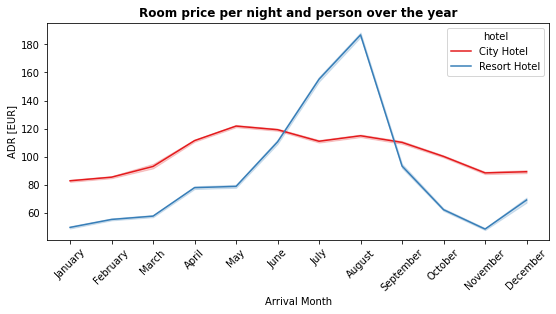

In [127]:
plt.figure(figsize=(9,4))
sns.lineplot(x = "arrivalmonth", y="adr", hue="hotel", data=data, hue_order = ["City Hotel", "Resort Hotel"],palette= 'Set1')
plt.title("Room price per night and person over the year", weight = 'bold')
plt.xlabel("Arrival Month")
plt.xticks(rotation=45)
plt.ylabel("ADR [EUR]")
plt.show()

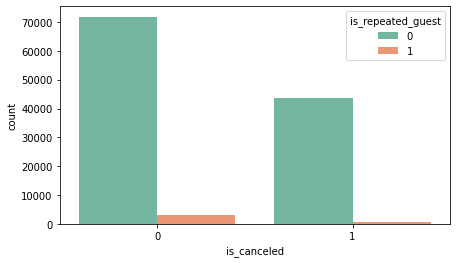

In [128]:
plt.figure(figsize=(7,4))
sns.countplot(x= 'is_canceled',hue = 'is_repeated_guest',data = data,palette= 'Set2')


In [129]:
data['deposit_type'].value_counts(normalize = True)

No Deposit    0.876277
Non Refund    0.122364
Refundable    0.001359
Name: deposit_type, dtype: float64

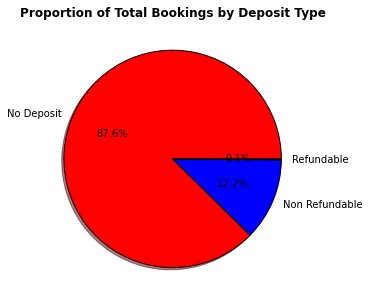

In [130]:
plt.figure(figsize=(9,5))
proportion = data['deposit_type'].value_counts()
labels = ['No Deposit','Non Refundable','Refundable']
plt.title('Proportion of Total Bookings by Deposit Type',weight = 'bold')
cols = ['red','blue','yellow']
plt.pie(proportion,labels=labels,shadow = True, autopct = '%1.1f%%',wedgeprops= {'edgecolor':'black'},colors =cols)
plt.show()

In [131]:
data.groupby('deposit_type')['is_canceled'].value_counts(normalize = True)

deposit_type  is_canceled
No Deposit    0              0.715980
              1              0.284020
Non Refund    1              0.993624
              0              0.006376
Refundable    0              0.777778
              1              0.222222
Name: is_canceled, dtype: float64

Text(0, 0.5, 'Reservation Count')

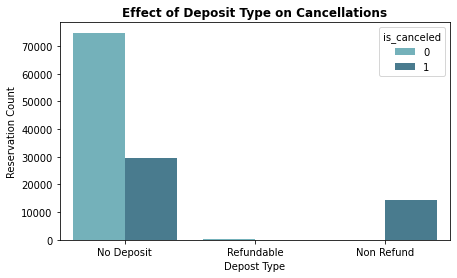

In [132]:
plt.figure(figsize=(7,4))
sns.countplot(x= 'deposit_type',hue = 'is_canceled',data = data,palette= 'GnBu_d')
plt.title('Effect of Deposit Type on Cancellations',weight = 'bold')
plt.xlabel('Depost Type')
plt.ylabel('Reservation Count')

In [133]:
data.groupby('meal')['is_canceled'].value_counts(normalize = True)

meal       is_canceled
BB         0              0.625894
           1              0.374106
FB         1              0.598997
           0              0.401003
HB         0              0.655347
           1              0.344653
SC         0              0.625936
           1              0.374064
Undefined  0              0.755346
           1              0.244654
Name: is_canceled, dtype: float64

Text(0, 0.5, 'Reservation Count')

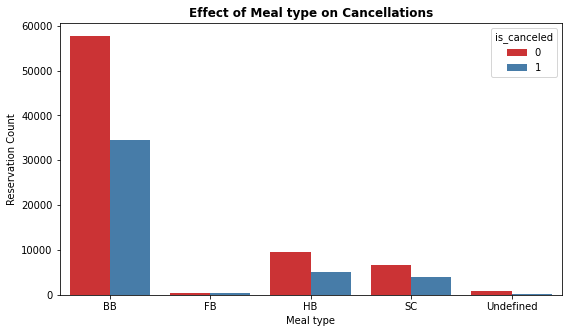

In [134]:
plt.figure(figsize=(9,5))
sns.countplot(x= 'meal',hue = 'is_canceled',data = data,palette= 'Set1')
plt.title ('Effect of Meal type on Cancellations',weight = 'bold')
plt.xlabel("Meal type")
plt.ylabel('Reservation Count')

In [135]:
data.groupby('required_car_parking_spaces')['is_canceled'].value_counts(normalize = True)

required_car_parking_spaces  is_canceled
0                            0              0.604664
                             1              0.395336
1                            0              1.000000
2                            0              1.000000
3                            0              1.000000
8                            0              1.000000
Name: is_canceled, dtype: float64

Text(0, 0.5, 'Reservation Count')

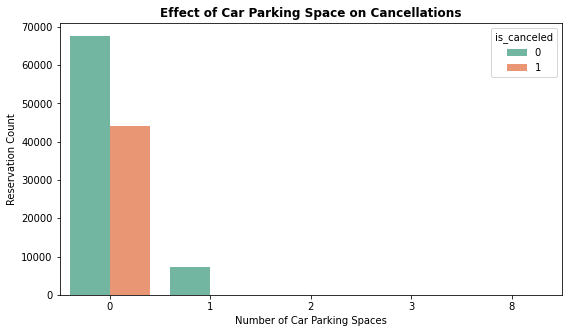

In [136]:
plt.figure(figsize=(9,5))
sns.countplot(x= 'required_car_parking_spaces',hue = 'is_canceled',data = data,palette= 'Set2')
plt.title ('Effect of Car Parking Space on Cancellations',weight = 'bold')
plt.xlabel("Number of Car Parking Spaces")
plt.ylabel('Reservation Count')

In [137]:
data.groupby('booking_changes')['is_canceled'].value_counts(normalize = True)[:5]

booking_changes  is_canceled
0                0              0.591345
                 1              0.408655
1                0              0.857571
                 1              0.142429
2                0              0.797354
Name: is_canceled, dtype: float64

Text(0, 0.5, 'Reservation Count')

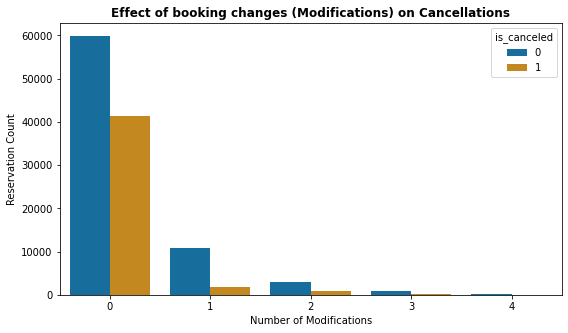

In [138]:
plt.figure(figsize=(9,5))
sns.countplot(x= 'booking_changes',order=pd.value_counts(data['booking_changes']).iloc[:5].index,hue = 'is_canceled',data = data,palette= 'colorblind')
plt.title ('Effect of booking changes (Modifications) on Cancellations',weight = 'bold')
plt.xlabel("Number of Modifications")
plt.ylabel('Reservation Count')

In [139]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [140]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)

In [141]:
y = data['is_canceled']
X = data.drop('is_canceled', axis = 1 , inplace = False)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, train_size = 0.7, test_size = 0.3)

In [143]:
#Decision Tree
model = DecisionTreeClassifier().fit(X_train, y_train)
model_pred = model.predict(X_test)

print("Test accuracy: {:.3f}".format(model.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, model_pred)))
print(confusion_matrix(y_test, model_pred))

Test accuracy: 1.000
F1 score: 1.000
[[22503     0]
 [    0 13260]]


In [144]:
#Random Forest
rf= RandomForestClassifier(random_state = 42, n_jobs = -1).fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Test accuracy: {:.3f}".format(rf.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))

Test accuracy: 1.000
F1 score: 1.000
[[22503     0]
 [    0 13260]]
